# Real-world Data Wrangling

In [3]:
# !python -m pip install kaggle==1.6.12

In [4]:
## !pip install --target=/workspace ucimlrepo numpy==1.24.3

**Note:** Restart the kernel to use updated package(s).

In [6]:
import pandas as pd
import numpy as np
import requests

## 1. Gather data

### **1.1.** Problem Statement
In this project, we will investigate the educational attainment levels among individuals employed in computer-related occupations in King County, Washington, by gathering, cleaning, and analyzing relevant data to identify trends, distributions, and potential correlations within the local workforce. Data from the Seattle-Tacoma area will be used as proxy to answer the research questions

#### Research Questions ####
1. What is the level of education of people employed in computer related roles
2. How does the level of education influence salary for computer-realated occupations

### **1.2.** Gathered U.S Bureau of Labor Statistics and U.S Census Bureau Dataset

##### RAW DATA SOURCE #####
- **U.S. Census B - Visual tool to generate custom us census table with API link provided**
    -https://data.census.gov/mdat/#/search?ds=ACSPUMS1Y2023&cv=WRK,SEX&rv=SOCP,ucgid&nv=SCHL&wt=PWGTP&g=795P200US5323301,5323302,5323303,5323304,5323305,5323306,5323307,5323308,5323310,5323311

- **US Labor and Stats**
    - https://www.bls.gov/oes/tables.htm
    - Metropolitan and nonmetropolitan area (HTML) (XLS)


#### **1.2.1** 2023 Occupational Employment and Wage (OEW) Statistics from U.S Bureau of Labor Statistics Dataset

Type: XLS file

Method: The data was gathered using the "Downloading files" method from U.S Bureau of Labor Statistics (Occupational Employment and Wage Statistics tables)

Dataset variables:

*   *AREA:* Area code
*   *AREA_TITLE:* Title of the metropolitan area
*   *OCC_CODE:* Occupational Code
*   *OCC_TITLE:* Occupational Title
*   *A_MEAN:* Mean Annual Wage

In [12]:
## Load OEW Dataset to access king county/seattle-tacoma area dataset
oew_data = pd.read_excel('./data/oew_statistics_2023_raw.xlsx')

In [13]:
## show the first 5 rows of dataset
oew_data.head(5)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN


#### **1.2.2** 2023 U.S Census Bureau Public Use Microdata Site (PUMS) Dataset - Custom Table

Type: API

Method: The data was gathered using the "API" method from the United States Census Bureau Public Use Microdata Sample site

Dataset variables:

*   *SOCP:* Standard Occupational Classification (SOC) codes for 2018 and later based oin 2018 SOC codes
*   *SCHL:* Educational Attainment
*   *SCHL_RC1:* Educational Attainment recode 

In [15]:
## Access PUMS API for census information for king county/seattle-tacoma dataset
url = 'https://api.census.gov/data/2023/acs/acs1/pums?get=PWGTP,SOCP,SCHL_RC1,SCHL&ucgid=795P200US5323304&recode+SCHL_RC1=%7B%22b%22:%22SCHL%22,%22d%22:%5B%5B%220%22,%2201%22,%2202%22,%2203%22,%2204%22,%2205%22,%2206%22,%2207%22,%2208%22,%2209%22,%2210%22,%2211%22,%2212%22,%2213%22,%2214%22,%2215%22%5D,%5B%2216%22,%2217%22%5D,%5B%2218%22,%2219%22%5D,%5B%2220%22,%2221%22%5D,%5B%2222%22,%2223%22,%2224%22%5D%5D%7D'
pums_response = requests.get(url)
pums_response.raise_for_status()

## Get the json
pums_response_data = pums_response.json()

## Create dataframe from json
columns = pums_response_data[0]
rows = pums_response_data[1:]
pums_data = pd.DataFrame(rows, columns=columns)

In [16]:
## show the first 5 rows of dataset
print(pums_data.head(5))

  PWGTP    SOCP SCHL_RC1 SCHL   PUMA STATE
0    47       N        3   19  23304    53
1    74  537062        3   19  23304    53
2    54       N        4   21  23304    53
3    18       N        4   21  23304    53
4    47       N        3   19  23304    53


In [17]:
## Make copy of dataset before assessment and cleaning
pums_data_copy = pums_data.copy()

In [18]:
### header is the first row of data 
print(pums_data_copy.head(5))

  PWGTP    SOCP SCHL_RC1 SCHL   PUMA STATE
0    47       N        3   19  23304    53
1    74  537062        3   19  23304    53
2    54       N        4   21  23304    53
3    18       N        4   21  23304    53
4    47       N        3   19  23304    53


In [19]:
# Saving raw PUMS dataset
pums_data.to_csv('./data/pums_2024_compsci_edlevel_king_county_raw.csv', index=False)

## 2. Assess data

Assessed the data according to data quality and tidiness metrics as reported below.

### Quality Issue 1: Invalid Values in A_MEAN Variable

In [22]:
#Inspecting dataframe for invalid characters in A_MEAN colums
oew_data.head(10)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN
5,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,44.89,62.57,87.76,46870,60760,93370,130140,182530,NaN,NaN
6,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,...,35.61,46.71,62.93,55000,63680,74070,97160,130900,NaN,NaN
7,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3012,Administrative Services Managers,...,46.03,60.83,76.67,73650,82890,95750,126520,159470,NaN,NaN
8,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3013,Facilities Managers,...,37.82,48.31,63.42,57690,63890,78670,100480,131920,NaN,NaN
9,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-3021,Computer and Information Systems Managers,...,63.29,79.7,98.19,67940,99750,131640,165770,204220,NaN,NaN


In [23]:
#Inspecting dataframe for invalid characters programmatically
oew_data['A_MEAN'].value_counts()

A_MEAN
*         1487
#          144
54330       50
46110       48
40820       47
          ... 
207260       1
238120       1
193040       1
161570       1
295110       1
Name: count, Length: 15760, dtype: int64

Issue and justification:
- **Issue**: Invalid Values in A_MEAN
- **Explanation**: Presence of invalid characters (‘*’ and ‘#’) in numerical fields affects data’s validity.

### Quality Issue 2: Incorrect Data Type for A_MEAN

In [26]:
#Inspecting dataframe for invalid data type for A_MEAN
oew_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

In [27]:
#Inspecting dataframe for invalid data type for A_MEAN programmatically
oew_data.dtypes

AREA              int64
AREA_TITLE       object
AREA_TYPE         int64
PRIM_STATE       object
NAICS             int64
NAICS_TITLE      object
I_GROUP          object
OWN_CODE          int64
OCC_CODE         object
OCC_TITLE        object
O_GROUP          object
TOT_EMP          object
EMP_PRSE         object
JOBS_1000        object
LOC_QUOTIENT     object
PCT_TOTAL       float64
PCT_RPT         float64
H_MEAN           object
A_MEAN           object
MEAN_PRSE        object
H_PCT10          object
H_PCT25          object
H_MEDIAN         object
H_PCT75          object
H_PCT90          object
A_PCT10          object
A_PCT25          object
A_MEDIAN         object
A_PCT75          object
A_PCT90          object
ANNUAL           object
HOURLY           object
dtype: object

Issue and justification:
- **Issue**: Incorrect Data Type for A_MEAN 
- **Explanation**: Incorrect data type is a validity issue as it prevents numerical operations; completeness typically refers to missing data rather than incorrect types

### Tidiness Issue 1: Limited dataset to Seattle-Tacoma-Washington only

In [30]:
# Inspecting the dataframe visually
oew_data['AREA'].value_counts()

AREA
35620    803
31080    779
37980    757
47900    750
16980    740
        ... 
21420    156
19180    155
25980    136
41900    122
25020     84
Name: count, Length: 396, dtype: int64

In [31]:
# Inspecting the dataframe programmatically
oew_data['AREA'].nunique()

396

Issue and justification:
- **Issue**: Dataset includes area outside the Seattle-Tacoma-Washinton region
- **Explanation**: The dataset includes regions beyond Seattle-Tacoma-Washington, which need to be filtered out to focus only on the relevant area.

### Tidiness Issue 2: Focus on Computer-Related Occupations in PUMS Dataset

In [34]:
# Inspecting the dataframe visually
pums_data.sample(10)

,PWGTP,SOCP,SCHL_RC1,SCHL,PUMA,STATE
235,67,232011,4,21,23304,53
519,48,291210,5,23,23304,53
1527,75,N,4,21,23304,53
1188,105,1520XX,5,22,23304,53
26,7,N,4,21,23304,53
1626,381,N,4,21,23304,53
1427,94,N,1,5,23304,53
326,39,N,2,16,23304,53
1328,73,411011,4,21,23304,53
745,42,537062,2,16,23304,53


In [35]:
#Inspecting the dataframe programmatically
pums_data['SOCP'].value_counts()

SOCP
N         691
151252    182
1191XX     63
1110XX     32
291210     25
         ... 
339021      1
273011      1
39509X      1
274021      1
395012      1
Name: count, Length: 218, dtype: int64

Issue and justification: 
- **Issue**: Non computer related occupation data in dataset
- **Explanation**: Limiting the dataset to relevant occupations ensures each row pertains to the specific observational unit needed

## 3. Clean data
- Cleaning data to solve the issues corresponding to data quality and tidiness found in the assessing step

In [38]:
## Make copy of dataset before cleaning
oew_cleaned = oew_data.copy()
pums_cleaned = pums_data.copy()

### **Quality Issue 1: Invalid Values in A_MEAN Variable**

In [40]:
# suppress warning
pd.set_option('future.no_silent_downcasting', True)

## clean - replace the * and # with np.nan
oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].replace(['*','#'], [np.nan, np.nan])

## drop NA values
#oew_cleaned = oew_cleaned.dropna()

In [41]:
## verify cleaning
oew_cleaned['A_MEAN'].value_counts()

A_MEAN
54330     50
46110     48
40820     47
38380     47
47300     47
          ..
143790     1
158300     1
147040     1
118300     1
295110     1
Name: count, Length: 15758, dtype: int64

Justification: 
- The column "A_MEAN" contains invalid values ('*' and '#') replacing with np.nan allows for the rows with those values to be dropped with dropna

### **Quality Issue 2: Incorrect Data Type for A_MEAN**

In [44]:
## convert A_MEAN datatype to float
oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].astype('float')

In [45]:
## verify data type conversion
assert oew_cleaned['A_MEAN'].dtype == 'float'

Justification: 
- *For calculation accuracy coverting A_MEAN to float from object*

### **Tidiness Issue 1: Limit OEW dataset to Seattle-Tacoma-Washington only**

In [48]:
# Filter in Seattle-Tacoma-Washington area only data 
seattle_area = 42660
oew_cleaned = oew_cleaned[oew_cleaned['AREA'] == seattle_area]

In [49]:
# Verify - Inspecting the dataframe visually
oew_cleaned.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
118893,42660,"Seattle-Tacoma-Bellevue, WA",4,WA,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,31.38,50.51,77.6,37970,46590,65260,105060,161400,NaN,NaN
118894,42660,"Seattle-Tacoma-Bellevue, WA",4,WA,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,76.98,102.4,#,80910,115350,160110,213000,#,NaN,NaN
118895,42660,"Seattle-Tacoma-Bellevue, WA",4,WA,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,#,#,#,188360,#,#,#,#,NaN,NaN
118896,42660,"Seattle-Tacoma-Bellevue, WA",4,WA,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,64.44,92.61,#,66200,94950,134040,192630,#,NaN,NaN
118897,42660,"Seattle-Tacoma-Bellevue, WA",4,WA,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,40050,56870,94410,210460,#,True,NaN


Justification: 
- *Filtering by location focuses the dataset on a specific observational unit*

### **Tidiness Issue 2: Focus on Computer-Related Occupations in PUMS Dataset**

In [52]:
## Filter for Computer-Related Occupations only in PUMS dataset 
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)]

In [53]:
# Verify - Programmatically
assert( pums_cleaned[~pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)].empty)

Justification: 
- *Only computer-related occupation data is required for analysis thus removing non-computer related occupations improves footprint*

### **Remove unnecessary variables and combine datasets**

#### **Remove unnecessary variables** ###

In [57]:
# Remove Unnecessary Columns from OEW dataset
oew_cleaned = oew_cleaned[['AREA', 'OCC_CODE', 'OCC_TITLE', 'A_MEAN']].reindex()

In [58]:
# Drop PWTP/PUMA/STATE variables
pums_cleaned = pums_cleaned[['SOCP','SCHL_RC1', 'SCHL']].reindex()

In [59]:
# Limit OEW dataset to Computer related occupations 
comsci_startswith = '15-'
oew_cleaned = oew_cleaned[ oew_cleaned['OCC_CODE'].str.startswith(comsci_startswith)]
assert(oew_cleaned[~oew_cleaned['OCC_CODE'].str.startswith(comsci_startswith)].empty)

In [60]:
## Fix format of OEW/OCC_CODE to match PUMS/SOCP by removing hyphen
oew_cleaned['OCC_CODE'] = oew_cleaned['OCC_CODE'].replace('-', '', regex=True)
assert not (oew_cleaned['OCC_CODE'].str.contains('-').any())

In [61]:
# Remove invalid Data in SOCP ( == 'N' ) Variable that is not relevant in this context
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'] != 'N']
assert( pums_cleaned[pums_cleaned['SOCP'] == 'N'].empty)

#### **Combine Dataset** ####

In [63]:
## Create lookup list for education level (ED_LEVEL)
ed_level_data = {
    'SCHL_RC1': ['1', '2', '3', '4', '5'],
    'ED_LEVEL': [
        'No high school diploma',    # SCHL_RC1 == 0
        'High school diploma',       # SCHL_RC1 == 1
        'Completed Some College',    # SCHL_RC1 == 2
        'Graduated College',         # SCHL_RC1 == 3
        'Completed Advanced Degree'   # SCHL_RC1 == 4
    ]
}

ed_level_df = pd.DataFrame(ed_level_data)

# merge with pums dataset using SCHL_RC1 as key
pums_merged = pums_cleaned.merge(ed_level_df, on='SCHL_RC1', how='left')
pums_merged.head()

,SOCP,SCHL_RC1,SCHL,ED_LEVEL
0,151252,4,21,Graduated College
1,151252,4,21,Graduated College
2,151252,5,22,Completed Advanced Degree
3,151252,5,22,Completed Advanced Degree
4,151252,5,22,Completed Advanced Degree


In [64]:
# merge oew and pums
pum_oew_merged = pums_merged.merge(oew_cleaned, left_on='SOCP', right_on='OCC_CODE', how='left')
pum_oew_merged.head(10)

,SOCP,SCHL_RC1,SCHL,ED_LEVEL,AREA,OCC_CODE,OCC_TITLE,A_MEAN
0,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130.0
1,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130.0
2,151252,5,22,Completed Advanced Degree,42660.0,151252,Software Developers,164130.0
3,151252,5,22,Completed Advanced Degree,42660.0,151252,Software Developers,164130.0
4,151252,5,22,Completed Advanced Degree,42660.0,151252,Software Developers,164130.0
5,151252,5,22,Completed Advanced Degree,42660.0,151252,Software Developers,164130.0
6,151252,5,22,Completed Advanced Degree,42660.0,151252,Software Developers,164130.0
7,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130.0
8,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130.0
9,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130.0


## 4. Update your data store
Updating local data store with the cleaned data

In [66]:
#Saving cleaned OEW dataset
oew_cleaned.to_csv('./data/oews_2024_compsci_wages_king_county_cleaned.csv', index=False)

In [67]:
# Saving cleaned PUMS dataset
pums_merged.to_csv('./data/pums_2024_compsci_edlevel_king_county_cleaned.csv', index=False)

In [68]:
#saving data
pum_oew_merged.to_csv('./data/pums_oews_2024_compsci_edlevel_merged.csv', index=False)

## 5. Answer the research question

#### Research Questions ####
1. What is the level of education of people employed in computer related roles
2. How does the level of education influence salary for computer-realated occupations

In [70]:
%matplotlib inline

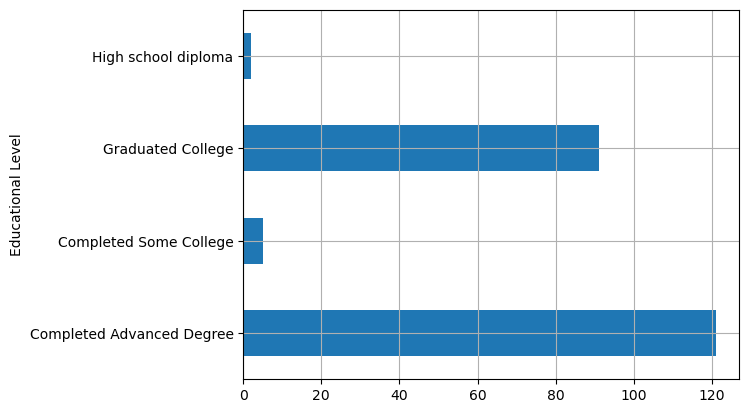

In [71]:
## Plot of level of education to the size in the dataset 
pum_oew_ed_level = pum_oew_merged.groupby('ED_LEVEL').size()
pum_oew_ed_level.plot(kind='barh', ylabel='Educational Level', legend=False, grid=True);

*Answer to research question:* 
- A majority of those employeed in computer related occupations have graduated collegge or have advanced degrees

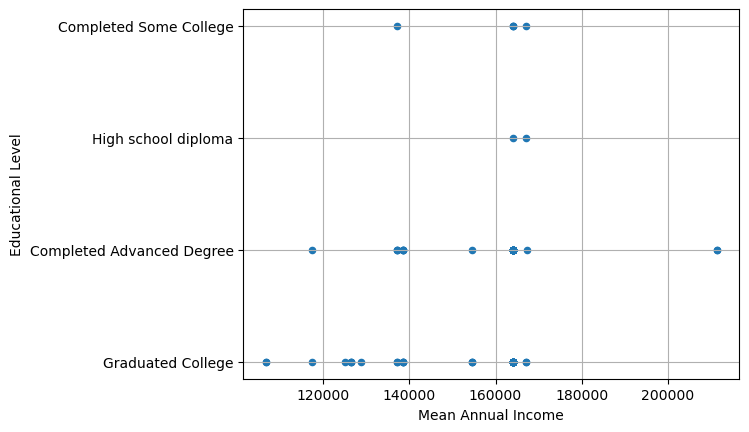

In [73]:
# Plot of impact of the level of education on salary
pum_oew_merged.plot(kind='scatter', y='ED_LEVEL', x='A_MEAN', 
                    ylabel='Educational Level', xlabel='Mean Annual Income',
                    legend=False,grid=True);

In [74]:
# Calculate the Pearson correlation coefficient
pearson_cc = pum_oew_merged['A_MEAN'].corr(pum_oew_merged['SCHL_RC1'])
print(f'Pearson Correlation Coefficient is {pearson_cc:.3f}')

Pearson Correlation Coefficient is 0.152


*Answer to research question:* 
- The scatter plot shows a weak trend, where average annual income does not increase by the level of education attained in computer related occupations. The Pearson coefficient of 0.152 confirms the weak correlation between eduational level and salary.

### **5.2:** Reflection
If I had more time for this project I will do more exploration in the following areas:
#### Data Related #### 
 - Investigate outliers in the mean annual income
 - Ensure data values and formatting align with industry standards
#### Analysis Related ###
- Analyze trends over time can help forecast salary expectations in the tech field
- Explore job type distribution to see which occupations are more or least common